# SIT744 Assignment 2: Deep Learning Project 

<div class="alert-info">
    <p>Due: <strong>8:00pm 29 May 2022</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>40%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynb</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong> or <strong>[YourID]_assingment2_output.pdf</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML or PDF format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynb </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be assessed based on the overall impact of your effort. A useful model (or application) should be your focus. But as in Assignment 1, we will also consider the following criteria at the same time.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to detail through a good quality assignment report.</li>
</ul>
</p>


</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will practice making design decisions yourself. You are also likely to encounter practical issues that will help you consolidate textbook learning. 

## **Task 1 (P Task) Smart Recycling using Deep Learning**

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. In Assignment 2, you will apply the best practices of deep-learning computer vision to make something useful for our planet—waste classification.

**Background** Every day, we put things into our recycle bin, to reduce landfill waste. However, we may unintentionally contribute to [recycling contamination](https://www.cleanaway.com.au/sustainable-future/contamination-main/) by "wish recycling" the wrong items. As every city council has slightly different rules for recycling, you will build a technological solution to ensure you only recycle things that are permitted by your local council. More discussions about recycling contamination can be found [here](https://www.cleanup.org.au/recycle).
![Recycling rule of a local council (source: Whitehorse City Council)](https://www.whitehorse.vic.gov.au/sites/whitehorse.vic.gov.au/files/assets/images/Recycle%20Right%20A3%20Poster.jpg "Recycling rule of a local council")

### Task 1.1 Define a problem

Define an image classification problem that may help people better recycle, particularly by reducing contamination.

Describe the desired inputs and outputs, including the target classes.

**Task 1.1 Define a problem**

The image classification problem that can help people better recycle by classifying waste items accurately into their respective recycling categories. This can be achieved by reducing recycling contamination, where incorrect items are mistakenly placed in recycling bins. The goal is to create a technological solution that assists users in correctly identifying which items can be recycled according to their local council's guidelines.

**Inputs and Outputs**

Inputs: The input to the model would be images of waste items that need to be classified. These images can be captured from various sources, such as smartphones or cameras.

Outputs: The model should provide the predicted recycling category for each waste item image and which bin to dispose them into.

### Task 1.2 Make a plan

What dataset can you use to develop a deep learning solution?

How many images do you need? How many for training? How many for testing?

Do you need to label the images yourself?

How do you determine if your model is good enough?

**Task 1.2 Make a plan**

To develop a deep learning solution for waste classification, the following steps can be considered:

1. Dataset Selection: Utilize the [dataset](https://www.kaggle.com/datasets/alveddian/waste-classification-data), which contains labeled images of waste items across different recycling categories.

2. Labeling: The dataset already provides labeled images, so there is no need for additional labeling.

3. Model Evaluation: Evaluate the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. These metrics will help determine if the model is performing well enough to classify waste items accurately.

### Task 1.3 Implement a solution

Collect relevant data.
Develop a deep learning model.
Report the model performance against the success criteria that you define.

**Task 1.3 Implement a solution**

1. Data Collection: Download the "Waste Classification Data" dataset from the Kaggle link.

2. Data Preprocessing: Perform necessary preprocessing steps on the images, such as resizing, normalization, and augmentation if required. Use an Oversampling technique if required

3. Model Development: Using transfer learning, we build a model to train.

4. Training: Train the model using the training set, adjusting hyperparameters like learning rate, batch size, and number of epochs. Monitor the training process for convergence and overfitting.

5. Model Evaluation: Evaluate the trained model using the testing set. Calculate the desired evaluation metrics (accuracy, precision, recall, F1-score) to assess its performance.

6. Fine-tuning: If the model does not meet the desired success criteria, fine-tune the model by experimenting with different architectures, hyperparameters, or data augmentation techniques. Repeat the training and evaluation process until satisfactory results are achieved.

7. Report Results: Document the model's performance against the defined success criteria, including the achieved accuracy and other evaluation metrics. Provide insights into the strengths and limitations of the model, and discuss potential applications and future improvements.

In [1]:
# Importing the required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import pandas as pd
import seaborn as sns
import threading
from PIL import Image
import tensorflow as tf

from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_dir = 'split-waste-dataset/train'
valid_dir = 'split-waste-dataset/valid'
test_dir = 'split-waste-dataset/test'
new_test = "split-waste-dataset/new_test"
oversampled_train_dir = 'split-waste-dataset/oversampled'
IMAGE_SIZE = 224
BATCH_SIZE = 32
class_names = ['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only allocate GPU memory as needed
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


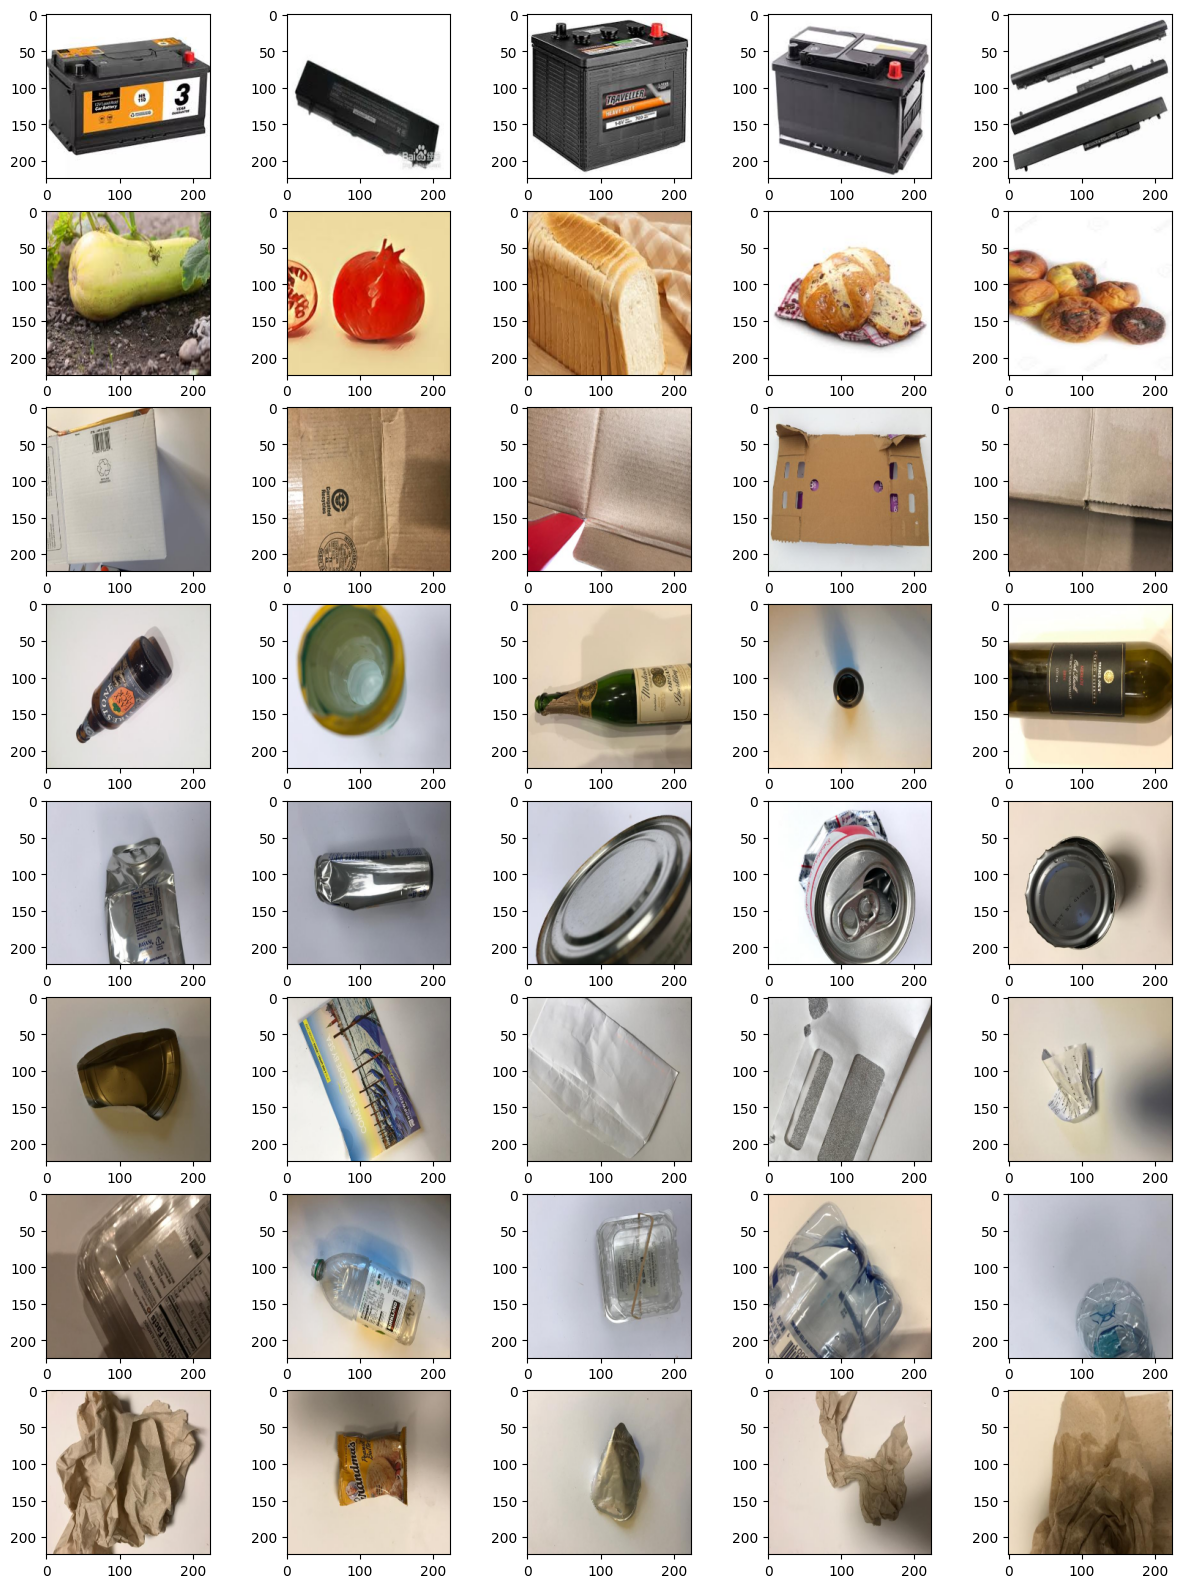

In [3]:
# Plot 5 random images from the training dataset for each class
fig, ax = plt.subplots(8, 5, figsize=(15, 20))

for class_name in os.listdir(train_dir):
    waste_class = os.path.join(train_dir, class_name)
    rand_imgs = np.random.randint(0, len(os.listdir(waste_class)), size=5)
    for i in rand_imgs:
        img = mpimg.imread(os.path.join(waste_class, os.listdir(waste_class)[i]))
        # Resize images
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        ax[list(os.listdir(train_dir)).index(class_name), rand_imgs.tolist().index(i)].imshow(img)

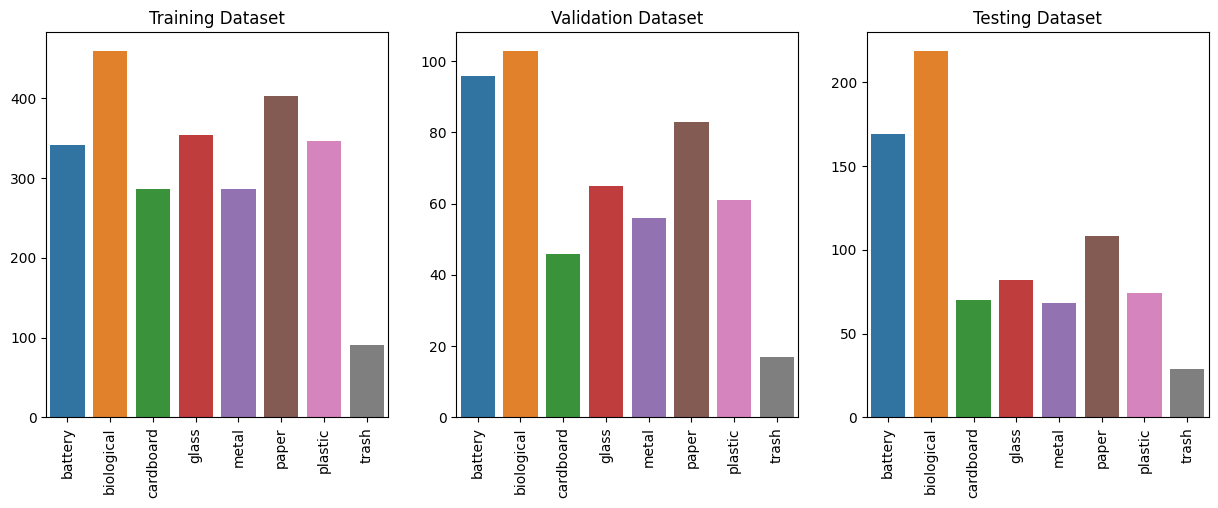

In [4]:
# Plot the number of images in each class for the training, validation and testing datasets
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=list(os.listdir(train_dir)), y=[len(os.listdir(os.path.join(train_dir, i))) for i in os.listdir(train_dir)], ax = ax[0])
ax[0].set_title('Training Dataset')
ax[0].xaxis.set_tick_params(rotation=90)

sns.barplot(x=list(os.listdir(valid_dir)), y=[len(os.listdir(os.path.join(valid_dir, i))) for i in os.listdir(valid_dir)], ax = ax[1])
ax[1].set_title('Validation Dataset')
ax[1].xaxis.set_tick_params(rotation=90)

sns.barplot(x=list(os.listdir(test_dir)), y=[len(os.listdir(os.path.join(test_dir, i))) for i in os.listdir(test_dir)], ax = ax[2])
ax[2].set_title('Testing Dataset')
ax[2].xaxis.set_tick_params(rotation=90)

I've oversampled the training set using SMOTE code below (Only run once):

In [ ]:
# X_train = []
# y_train = []

# for class_name in os.listdir(train_dir):
#     waste_classs = os.path.join(train_dir, class_name)
#     for img_name in os.listdir(waste_classs):
#         img = cv2.imread(os.path.join(waste_classs, img_name))
#         img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
#         X_train.append(img)
#         y_train.append(class_names.index(class_name))

# X_train = np.array(X_train)

# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train.reshape(X_train.shape[0], -1), y_train)
# X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3)

# # Save the oversampled dataset
# oversampled_train_dir = 'split-waste-dataset/oversampled'
# i = 0
# for class_name in y_train:
#     if not os.path.exists(os.path.join(oversampled_train_dir, class_names[class_name])):
#         os.makedirs(os.path.join(oversampled_train_dir, class_names[class_name]))
#     cv2.imwrite(os.path.join(oversampled_train_dir, class_names[class_name], str(class_name) + str(i) + '.jpg'), X_train[class_name])
    

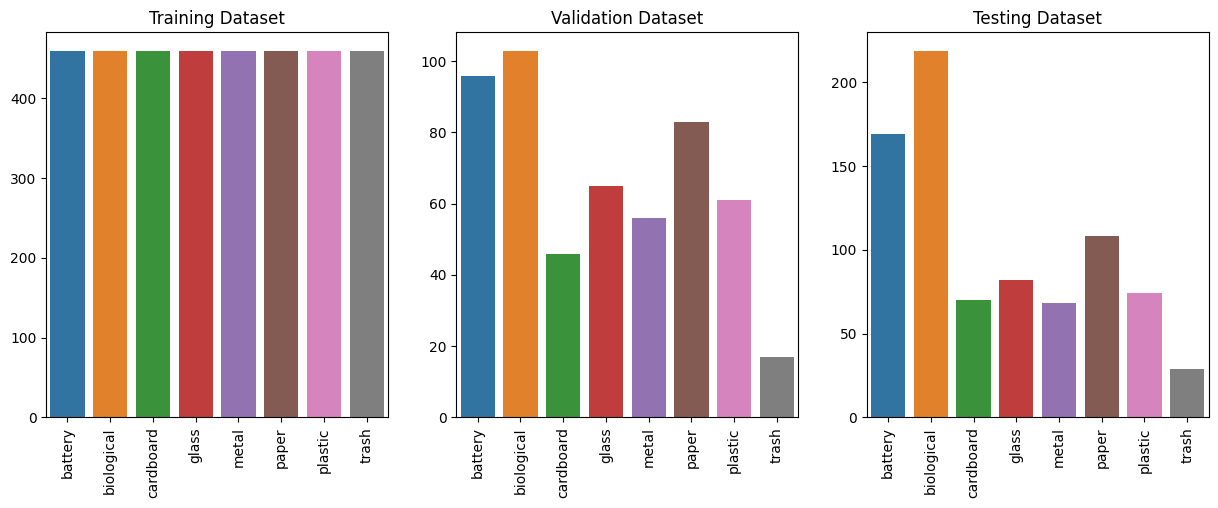

In [4]:
# Plot the number of images in each class for the training, validation and testing datasets
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
train_dir = oversampled_train_dir

sns.barplot(x=list(os.listdir(train_dir)), y=[len(os.listdir(os.path.join(train_dir, i))) for i in os.listdir(train_dir)], ax = ax[0])
ax[0].set_title('Training Dataset')
ax[0].xaxis.set_tick_params(rotation=90)

sns.barplot(x=list(os.listdir(valid_dir)), y=[len(os.listdir(os.path.join(valid_dir, i))) for i in os.listdir(valid_dir)], ax = ax[1])
ax[1].set_title('Validation Dataset')
ax[1].xaxis.set_tick_params(rotation=90)

sns.barplot(x=list(os.listdir(test_dir)), y=[len(os.listdir(os.path.join(test_dir, i))) for i in os.listdir(test_dir)], ax = ax[2])
ax[2].set_title('Testing Dataset')
ax[2].xaxis.set_tick_params(rotation=90)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
)

Found 3680 images belonging to 8 classes.
Found 527 images belonging to 8 classes.
Found 819 images belonging to 8 classes.


In [7]:
from tensorflow.keras.applications import MobileNetV2

model = Sequential()

# Add the Xception convolutional base model
mobile = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), 
                     include_top=False,
                     weights='imagenet')

# Freeze the convolutional base
for layer in mobile.layers:
    layer.trainable = False

mobile.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [8]:
# Add new layers
model.add(mobile)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 256)               16056576  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                1

In [9]:
model.save_weights('models/Before_training.h5')

In [9]:
callback_1 = EarlyStopping(monitor='val_loss', patience=6, mode='auto')
callback_2 = EarlyStopping(monitor='val_accuracy', patience=6, mode='auto')
callback_3 = ModelCheckpoint(filepath='models/MobileNetv2_model.h5', monitor='val_accuracy', save_best_only=True)

In [11]:
# Clear the session
clear_session()
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    epochs = 30,
    callbacks = [callback_1, callback_2, callback_3]
)

clear_session()

Epoch 1/30
115/115 [==============================] - 37s 247ms/step - loss: 1.1845 - accuracy: 0.5946 - val_loss: 0.5415 - val_accuracy: 0.8159
Epoch 2/30
115/115 [==============================] - 25s 221ms/step - loss: 0.7920 - accuracy: 0.7367 - val_loss: 0.4288 - val_accuracy: 0.8558
Epoch 3/30
115/115 [==============================] - 27s 238ms/step - loss: 0.6812 - accuracy: 0.7666 - val_loss: 0.4437 - val_accuracy: 0.8558
Epoch 4/30
115/115 [==============================] - 27s 233ms/step - loss: 0.6088 - accuracy: 0.7943 - val_loss: 0.3940 - val_accuracy: 0.8691
Epoch 5/30
115/115 [==============================] - 28s 241ms/step - loss: 0.5868 - accuracy: 0.8008 - val_loss: 0.3879 - val_accuracy: 0.8729
Epoch 6/30
115/115 [==============================] - 28s 244ms/step - loss: 0.5281 - accuracy: 0.8234 - val_loss: 0.3343 - val_accuracy: 0.8899
Epoch 7/30
115/115 [==============================] - 28s 245ms/step - loss: 0.5012 - accuracy: 0.8302 - val_loss: 0.3629 - val_ac

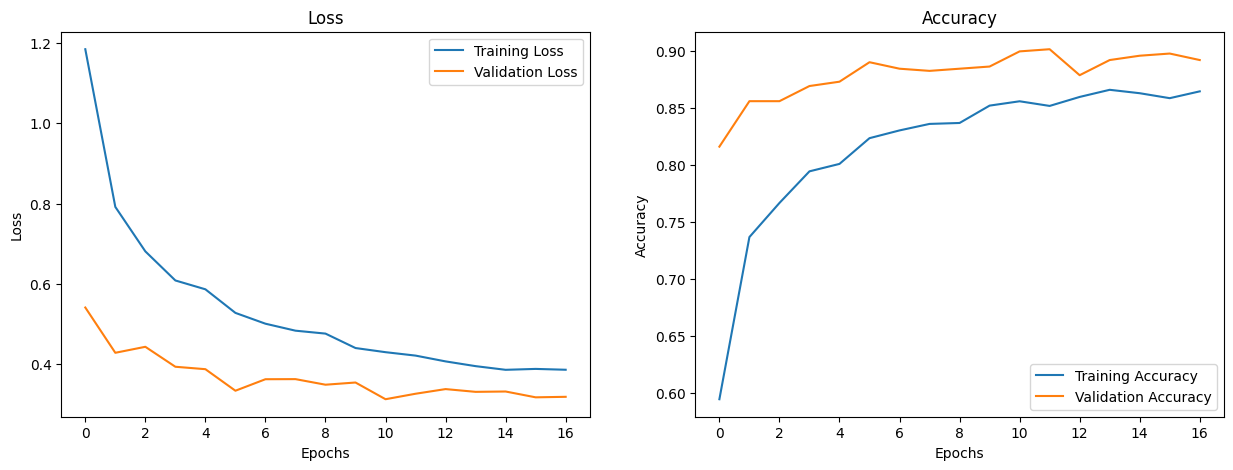

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x='epoch', y='loss', data=hist, label='Training Loss', ax = ax[0])
sns.lineplot(x='epoch', y='val_loss', data=hist, label='Validation Loss', ax = ax[0])
ax[0].set_title('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

sns.lineplot(x='epoch', y='accuracy', data=hist, label='Training Accuracy', ax = ax[1])
sns.lineplot(x='epoch', y='val_accuracy', data=hist, label='Validation Accuracy', ax = ax[1])
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 2570 images belonging to 8 classes.
Found 819 images belonging to 8 classes.


In [14]:
# Evaluate the model on the test data
# Accuracy, Precision, Recall and F1 Score
print('Evaluating the model on the train data...')
y_true = train_generator.classes
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

Evaluating the model on the train data...
115/115 [==============================] - 25s 209ms/step
              precision    recall  f1-score   support

     battery       0.97      0.99      0.98       460
  biological       0.99      1.00      0.99       460
   cardboard       0.97      0.90      0.93       460
       glass       0.87      0.81      0.84       460
       metal       0.86      0.90      0.88       460
       paper       0.94      0.90      0.92       460
     plastic       0.85      0.84      0.84       460
       trash       0.85      0.94      0.89       460

    accuracy                           0.91      3680
   macro avg       0.91      0.91      0.91      3680
weighted avg       0.91      0.91      0.91      3680



In [15]:
# Evaluate the model on the test data
# Accuracy, Precision, Recall and F1 Score
print('Evaluating the model on the test data...')
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

Evaluating the model on the test data...
26/26 [==============================] - 1s 50ms/step


26/26 [==============================] - 1s 54ms/step


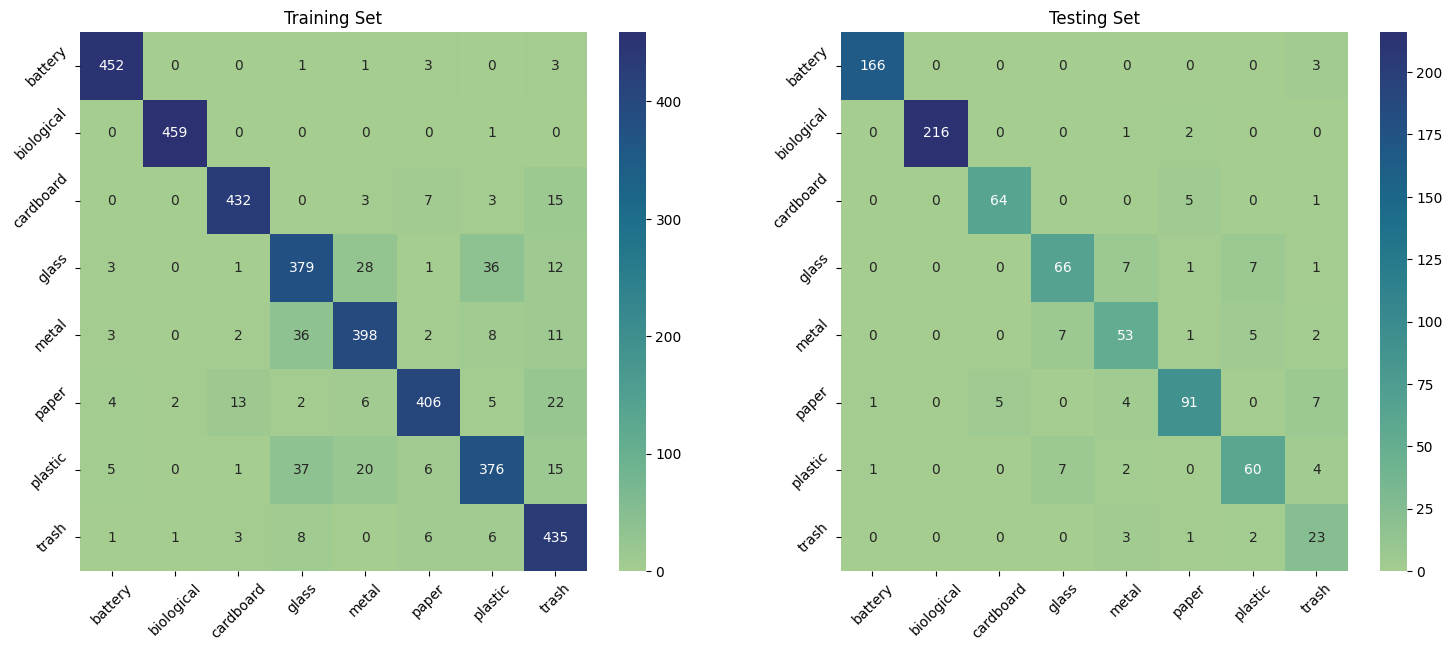

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))
y_true = train_generator.classes
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', ax=ax[0])
ax[0].set_title('Training Set')
# Changing xticks and yticks
ax[0].set_xticklabels(class_names)
ax[0].set_yticklabels(class_names)
# Rotate the ticklabels
ax[0].tick_params(axis='x', rotation=45)
ax[0].tick_params(axis='y', rotation=45)

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', ax=ax[1])
ax[1].set_title('Testing Set')
# Changing xticks and yticks
ax[1].set_xticklabels(class_names)
ax[1].set_yticklabels(class_names)
# Rotate the ticklabels
ax[1].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='y', rotation=45)

In [25]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  true_label = np.argmax(true_label, axis=1)
  # predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  predictions_array = predictions_array[i]
  true_label = true_label[i]
  img = img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    true_label = np.argmax(true_label, axis=1)
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(8), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [33]:
X_test = []
y_test = []
i = 0
for data_batch, labels_batch in test_generator:
    i += 1
    if i == 26:
        break
    X_test.append(data_batch)
    y_test.append(labels_batch)

# Concatenate the batches into a single array
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

print(X_test.shape, y_test.shape)

(787, 224, 224, 3) (787, 8)


25/25 [==============================] - 2s 35ms/step


C:\Users\sudak\AppData\Local\Temp\ipykernel_19152\919974737.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 2*num_cols, 2*i+1)


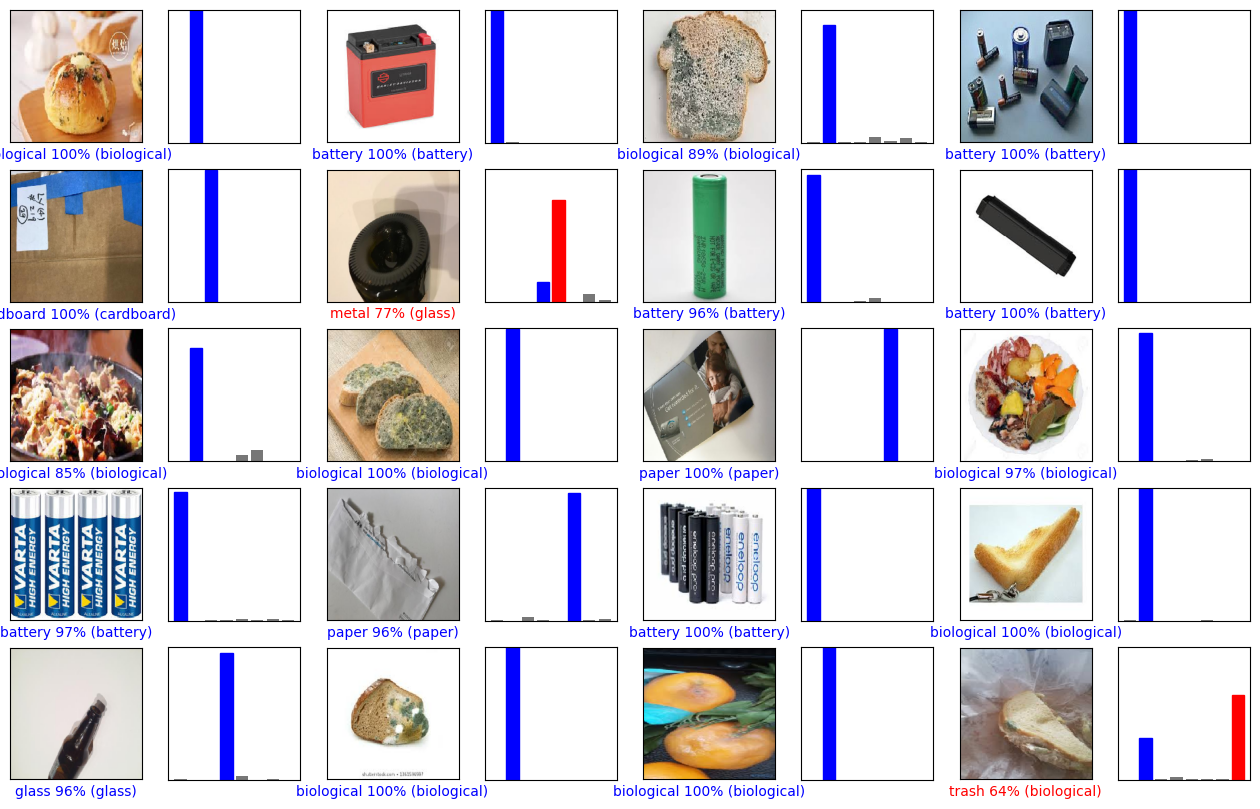

In [34]:
# Plot 20 random test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
predictions = model.predict(X_test)
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("15 Random Images from the Test Set")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    r_num = np.random.randint(low=0, high=len(np.argmax(y_test, axis=1)))
    plot_image(r_num, predictions, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(r_num, predictions, y_test)

## **Task 2 (C Task) Analyse and improve the model**

### Task 2.1 Build an input pipeline for data augmentation


Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the model performance with the pipeline added. How much performance gain have you achieved?    

- Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use a profiler such as the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)


### Task 2.2 Compare the performance under equal training time

You may notice that with your pipeline, the model performance improves, but at the cost of a longer training time per epoch. Is the additional training time well spent? Compare the dynamic of model performance (e.g., classification accuracy on the test data) with and without data augmentation, when equal training time is spent in the two scenarios. 

### Task 2.3 Identifying model strength and weakness

Identify images that are incorrectly classified by your model. Do they share something in common? How do you plan to improve the model's performance on those images?

### Task 2.1 Build a data preprocessing pipeline

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_dir = 'split-waste-dataset/train'

# No augmentation
train_generator_1 = test_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle = False
)

Found 2570 images belonging to 8 classes.


In [19]:
# Clear the session
clear_session()

callback_1 = EarlyStopping(monitor='val_loss', patience=5, mode='auto')
callback_2 = EarlyStopping(monitor='val_accuracy', patience=5, mode='auto')

# Equal Starting point
model.load_weights('models/Before_training.h5')

history = model.fit(
    train_generator_1,
    validation_data = valid_generator,
    epochs = 30,
    callbacks = [callback_1, callback_2]
)

model.save_weights('models/without_aug.h5')

clear_session()

Epoch 1/30
81/81 [==============================] - 29s 347ms/step - loss: 2.3368 - accuracy: 0.2016 - val_loss: 1.6747 - val_accuracy: 0.4497
Epoch 2/30
81/81 [==============================] - 4s 53ms/step - loss: 1.7000 - accuracy: 0.4222 - val_loss: 1.3348 - val_accuracy: 0.5939
Epoch 3/30
81/81 [==============================] - 4s 53ms/step - loss: 1.3241 - accuracy: 0.5837 - val_loss: 1.1742 - val_accuracy: 0.6641
Epoch 4/30
81/81 [==============================] - 4s 51ms/step - loss: 1.0793 - accuracy: 0.7004 - val_loss: 1.0553 - val_accuracy: 0.7002
Epoch 5/30
81/81 [==============================] - 5s 61ms/step - loss: 0.9014 - accuracy: 0.7891 - val_loss: 1.0028 - val_accuracy: 0.7192
Epoch 6/30
81/81 [==============================] - 5s 61ms/step - loss: 0.7664 - accuracy: 0.8381 - val_loss: 0.9308 - val_accuracy: 0.7571
Epoch 7/30
81/81 [==============================] - 5s 60ms/step - loss: 0.6480 - accuracy: 0.8844 - val_loss: 0.8985 - val_accuracy: 0.7590
Epoch 8/30


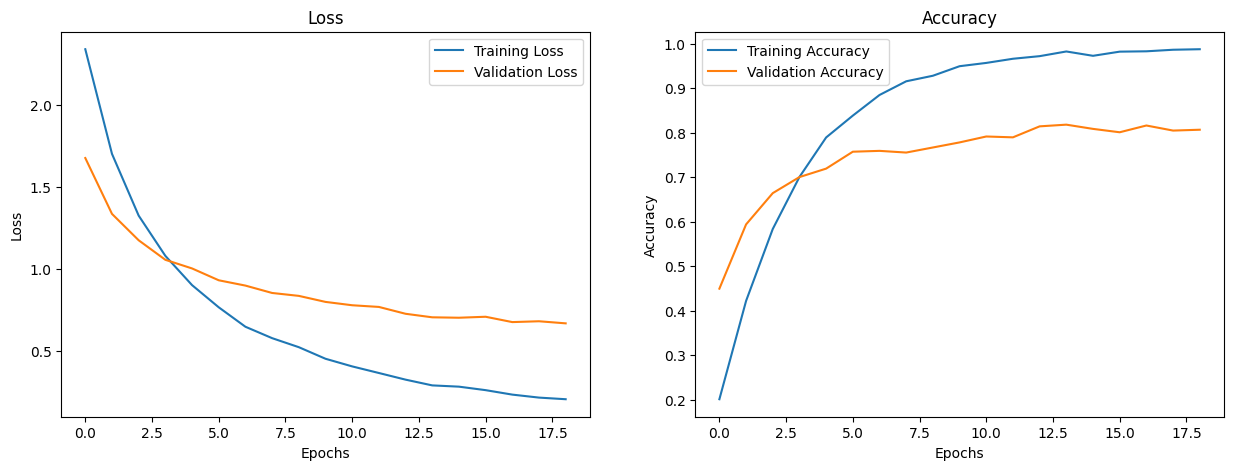

In [20]:
# In case the images above don't load properly here's the matplotlib graphs
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x='epoch', y='loss', data=hist, label='Training Loss', ax = ax[0])
sns.lineplot(x='epoch', y='val_loss', data=hist, label='Validation Loss', ax = ax[0])
ax[0].set_title('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

sns.lineplot(x='epoch', y='accuracy', data=hist, label='Training Accuracy', ax = ax[1])
sns.lineplot(x='epoch', y='val_accuracy', data=hist, label='Validation Accuracy', ax = ax[1])
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

**Let's compare classification reports**

In [24]:
# Accuracy, Precison, Recall and F1 Score
print('Evaluating the model without Preprocessing Pipeline on the test data...')
model.load_weights('models/without_aug.h5')
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_true, y_pred))

print('Evaluating the model with Preprocessing Pipeline on the test data...')
model.load_weights('models/MobileNetv2_model.h5')
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_true, y_pred))

Evaluating the model without Preprocessing Pipeline on the test data...
26/26 [==============================] - 2s 57ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       169
           1       0.94      1.00      0.97       219
           2       0.74      0.69      0.71        70
           3       0.72      0.66      0.69        82
           4       0.70      0.62      0.66        68
           5       0.72      0.84      0.77       108
           6       0.64      0.68      0.66        74
           7       0.71      0.17      0.28        29

    accuracy                           0.82       819
   macro avg       0.77      0.70      0.71       819
weighted avg       0.82      0.82      0.81       819

Evaluating the model with Preprocessing Pipeline on the test data...
26/26 [==============================] - 1s 47ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99  

As seen above

- Accuracy goes from 0.82 --> 0.90
- Precision (Weighted Average) goes from 0.82 --> 0.90
- Recall (Weighted Average) goes from 0.82 --> 0.90
- F1-Score (Weighted Average) goes from 0.81 --> 0.90

As seen there is a performance gain. The model is now able to classify waste items more accurately, which is the goal of this task.

26/26 [==============================] - 1s 22ms/step


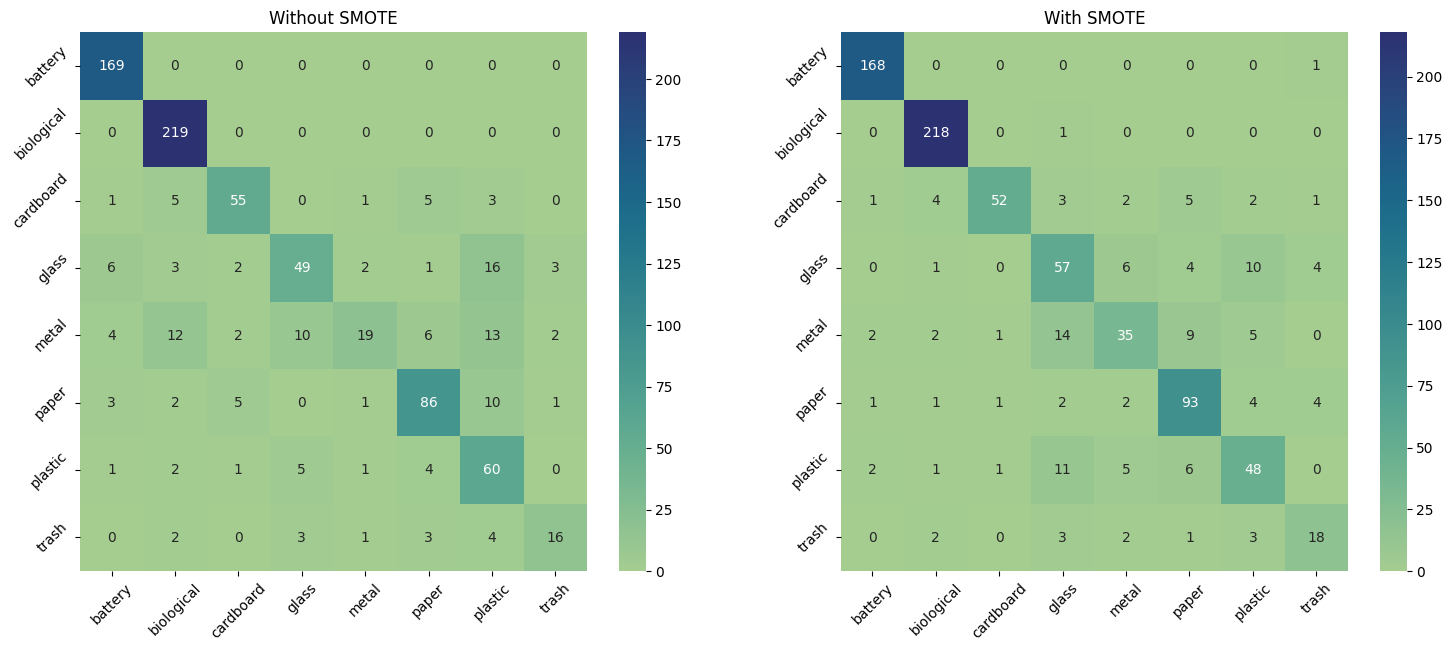

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))
y_true = test_generator.classes
model.load_weights('models/without_aug.h5')
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', ax=ax[0])
ax[0].set_title('Without Preprocessing Pipeline')
# Changing xticks and yticks
ax[0].set_xticklabels(class_names)
ax[0].set_yticklabels(class_names)
# Rotate the ticklabels
ax[0].tick_params(axis='x', rotation=45)
ax[0].tick_params(axis='y', rotation=45)

y_true = test_generator.classes
model.load_weights('models/MobileNetv2_model.h5')
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', ax=ax[1])
ax[1].set_title('With Preprocessing Pipeline')
# Changing xticks and yticks
ax[1].set_xticklabels(class_names)
ax[1].set_yticklabels(class_names)
# Rotate the ticklabels
ax[1].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='y', rotation=45)

**Profiler**

I tried to implement the TensorBoard Profiler here but am unable to get it to work here as well as in the notebook made by tensorflow [here](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/tensorboard_profiling_keras.ipynb). I changed my implmentation to use the tf.experimental.profiler and still failed. I'm guessing there might be some sort of an issue with the plugin at the moment. I also tried to follow [this github issue](https://github.com/tensorflow/profiler/issues/330) to solve it but as you can see below, it still doesn't work.

I also have CUPTI in my system environment variables 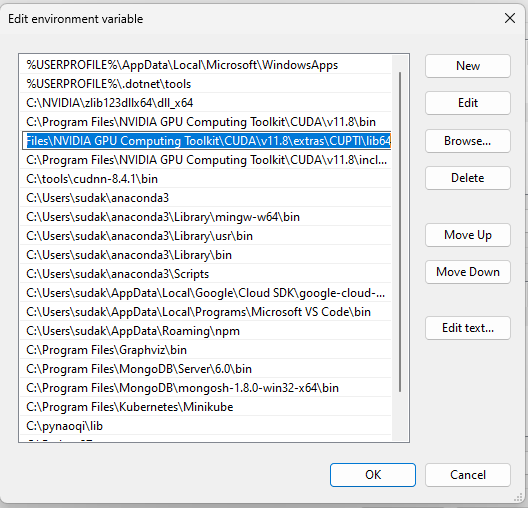

In [15]:
import datetime
import shutil
from tensorflow.python.profiler import profiler_client

def create_model():
    model = Sequential()

    # Add the Xception convolutional base model
    mobile = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), 
                        include_top=False,
                        weights='imagenet')

    # Freeze the convolutional base
    for layer in mobile.layers:
        layer.trainable = False

    # Add new layers
    model.add(mobile)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def train_model():
    # Clean directory
    for filename in os.listdir("logs"):
        file_path = os.path.join("logs", filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

    tf.profiler.experimental.start('logs')
    model = create_model()

    # logdir = "logs"
    # tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1, profile_batch = (1, 20))
    
    # Equal Starting point
    model.load_weights('models/Before_training.h5')

    model.fit(
        train_generator,
        validation_data = valid_generator,
        epochs = 2,
    )

    model.save_weights('models/without_aug.h5')

    tf.profiler.experimental.stop()
    clear_session()

train_model()

Epoch 1/2
115/115 [==============================] - 30s 238ms/step - loss: 1.1472 - accuracy: 0.6147 - val_loss: 0.5719 - val_accuracy: 0.7913
Epoch 2/2
115/115 [==============================] - 26s 226ms/step - loss: 0.7704 - accuracy: 0.7334 - val_loss: 0.4665 - val_accuracy: 0.8406


In [17]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [18]:
%tensorboard --inspect --logdir="logs"

ERROR: Failed to launch TensorBoard (exited with 0).
Contents of stdout:
Processing event files... (this can take a few minutes)

No event files found within logdir logs

In [19]:
# Launch TensorBoard and navigate to the Profile tab to view performance profile
%tensorboard --logdir="logs"

### Task 2.2: Compare Performance Under Equal Time

In [20]:
# Define time limit
time_limit = 1 * 60 # 1 min

# Both models will start from the same weight initialization
model.load_weights('models/Before_training.h5')

def timer_callback(model_name):
    model.stop_training = True
    model.save_weights(model_name + '.h5')
    print('Time limit exceeded, stopping training...')

timer_thread = threading.Timer(time_limit, timer_callback, args=['models/without_aug'])
timer_thread.start()

# Train the model
history = model.fit(
    train_generator_1,
    validation_data = valid_generator,
    epochs = 30,
    callbacks = [callback_1, callback_2]
)

# Cancel the timer if the training stops before the time limit
timer_thread.cancel()

Epoch 1/30
81/81 [==============================] - 6s 65ms/step - loss: 2.3331 - accuracy: 0.1957 - val_loss: 1.5688 - val_accuracy: 0.4516
Epoch 2/30
81/81 [==============================] - 6s 73ms/step - loss: 1.6833 - accuracy: 0.4163 - val_loss: 1.3256 - val_accuracy: 0.5636
Epoch 3/30
81/81 [==============================] - 6s 69ms/step - loss: 1.3091 - accuracy: 0.5802 - val_loss: 1.1182 - val_accuracy: 0.6433
Epoch 4/30
81/81 [==============================] - 6s 70ms/step - loss: 1.0524 - accuracy: 0.7000 - val_loss: 1.0821 - val_accuracy: 0.6774
Epoch 5/30
81/81 [==============================] - 5s 64ms/step - loss: 0.8778 - accuracy: 0.7767 - val_loss: 1.0100 - val_accuracy: 0.6926
Epoch 6/30
81/81 [==============================] - 6s 76ms/step - loss: 0.7415 - accuracy: 0.8366 - val_loss: 0.9472 - val_accuracy: 0.7324
Epoch 7/30
81/81 [==============================] - 5s 64ms/step - loss: 0.6537 - accuracy: 0.8712 - val_loss: 0.8810 - val_accuracy: 0.7514
Epoch 8/30
81

In [21]:
# Define time limit
time_limit = 1 * 60 # 1 min

# Both models will start from the same weight initialization
model.load_weights('models/Before_training.h5')

def timer_callback(model_name):
    model.stop_training = True
    model.save_weights(model_name + '.h5')
    print('Time limit exceeded, stopping training...')


timer_thread = threading.Timer(time_limit, timer_callback, args=['models/with_aug'])
timer_thread.start()

# Train the model
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    batch_size = BATCH_SIZE,
    epochs = 30,
    callbacks = [callback_1, callback_2]
)

# Cancel the timer if the training stops before the time limit
timer_thread.cancel()

Epoch 1/30
81/81 [==============================] - 21s 256ms/step - loss: 2.3982 - accuracy: 0.1661 - val_loss: 2.1032 - val_accuracy: 0.2581
Epoch 2/30
81/81 [==============================] - 19s 236ms/step - loss: 2.0187 - accuracy: 0.2595 - val_loss: 1.6832 - val_accuracy: 0.4459
Epoch 3/30
81/81 [==============================] - 19s 231ms/step - loss: 1.7885 - accuracy: 0.3700 - val_loss: 1.5377 - val_accuracy: 0.5085
Epoch 4/30
81/81 [==============================] - 2s 23ms/step - loss: 1.7247 - accuracy: 0.4625 - val_loss: 1.6025 - val_accuracy: 0.4839


As observed above, the model which was training without augmentation was able to finish almost 11 epochs in 1 min. On the other hand, the model which was training with augmentation was able to finish only 3 epochs in 1 min. This means that the model with augmentation is taking more time to train per epoch. However, the model with augmentation is able to achieve better performance than the model without augmentation if trained to completion as seen in Task 2.1. Therefore, the additional training time is well spent.

26/26 [==============================] - 1s 46ms/step


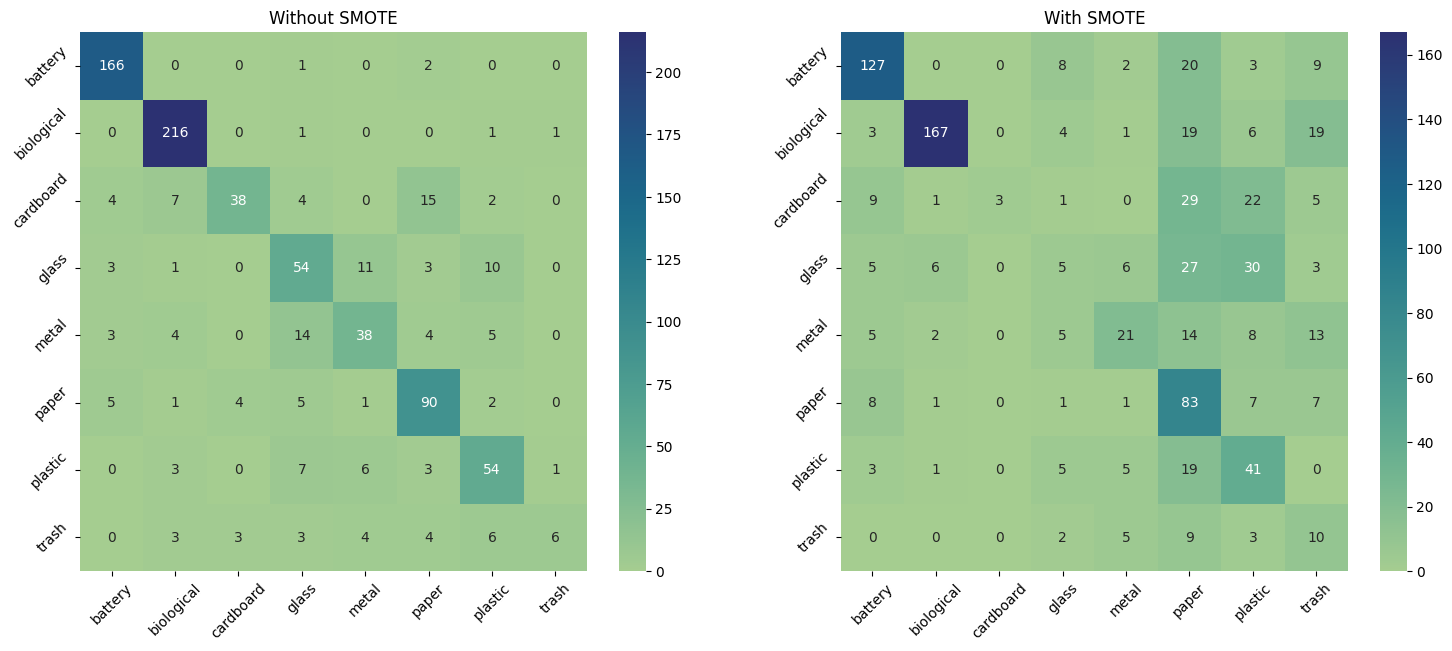

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))
y_true = test_generator.classes
model.load_weights('models/without_aug.h5')
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', ax=ax[0])
ax[0].set_title('Without SMOTE')
# Changing xticks and yticks
ax[0].set_xticklabels(class_names)
ax[0].set_yticklabels(class_names)
# Rotate the ticklabels
ax[0].tick_params(axis='x', rotation=45)
ax[0].tick_params(axis='y', rotation=45)

y_true = test_generator.classes
model.load_weights('models/with_aug.h5')
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', ax=ax[1])
ax[1].set_title('With SMOTE')
# Changing xticks and yticks
ax[1].set_xticklabels(class_names)
ax[1].set_yticklabels(class_names)
# Rotate the ticklabels
ax[1].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='y', rotation=45)

### Task 2.3 Identifying model strangth and weaknesses

26/26 [==============================] - 2s 58ms/step


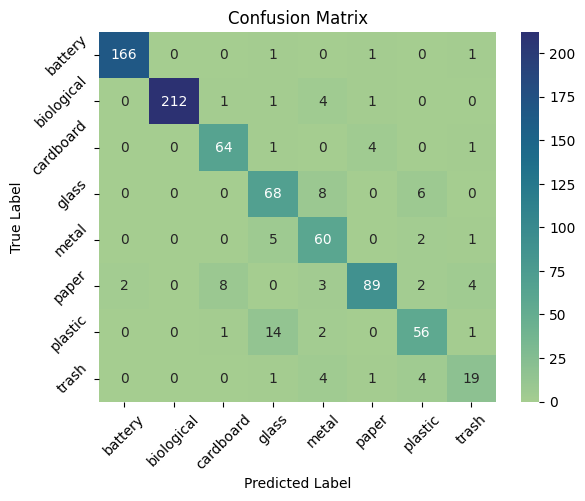

In [25]:
model.load_weights('models/MobileNetv2_model.h5')

# Plotting Confusion Matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred)
cm = sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
cm.set_xticklabels(class_names, rotation=45)
cm.set_yticklabels(class_names, rotation=45)
cm.set_xlabel('Predicted Label')
cm.set_ylabel('True Label')
cm.set_title('Confusion Matrix')

plt.show()

From the confusion matrix, it can be seen that the model is struggling when classyfying the following:

- Cardboard
    - It predicts Paper as Cardboard ~10% (8/(1+64+8+1)) of the time
- Glass 
    - It predicts Plastic as Glass ~15% (14/(1+1+1+68+5+14+1)) of the time
- Metal 
    - It predicts Glass as Metal ~10% (8/(4+8+60+3+2+4)) of the time

In [30]:
X_test = []
y_test = []
i = 0
for data_batch, labels_batch in test_generator:
    i += 1
    if i == 26:
        break
    X_test.append(data_batch)
    y_test.append(labels_batch)

# Concatenate the batches into a single array
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

print(X_test.shape, y_test.shape)

(800, 224, 224, 3) (800, 8)


In [ ]:
y_test = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

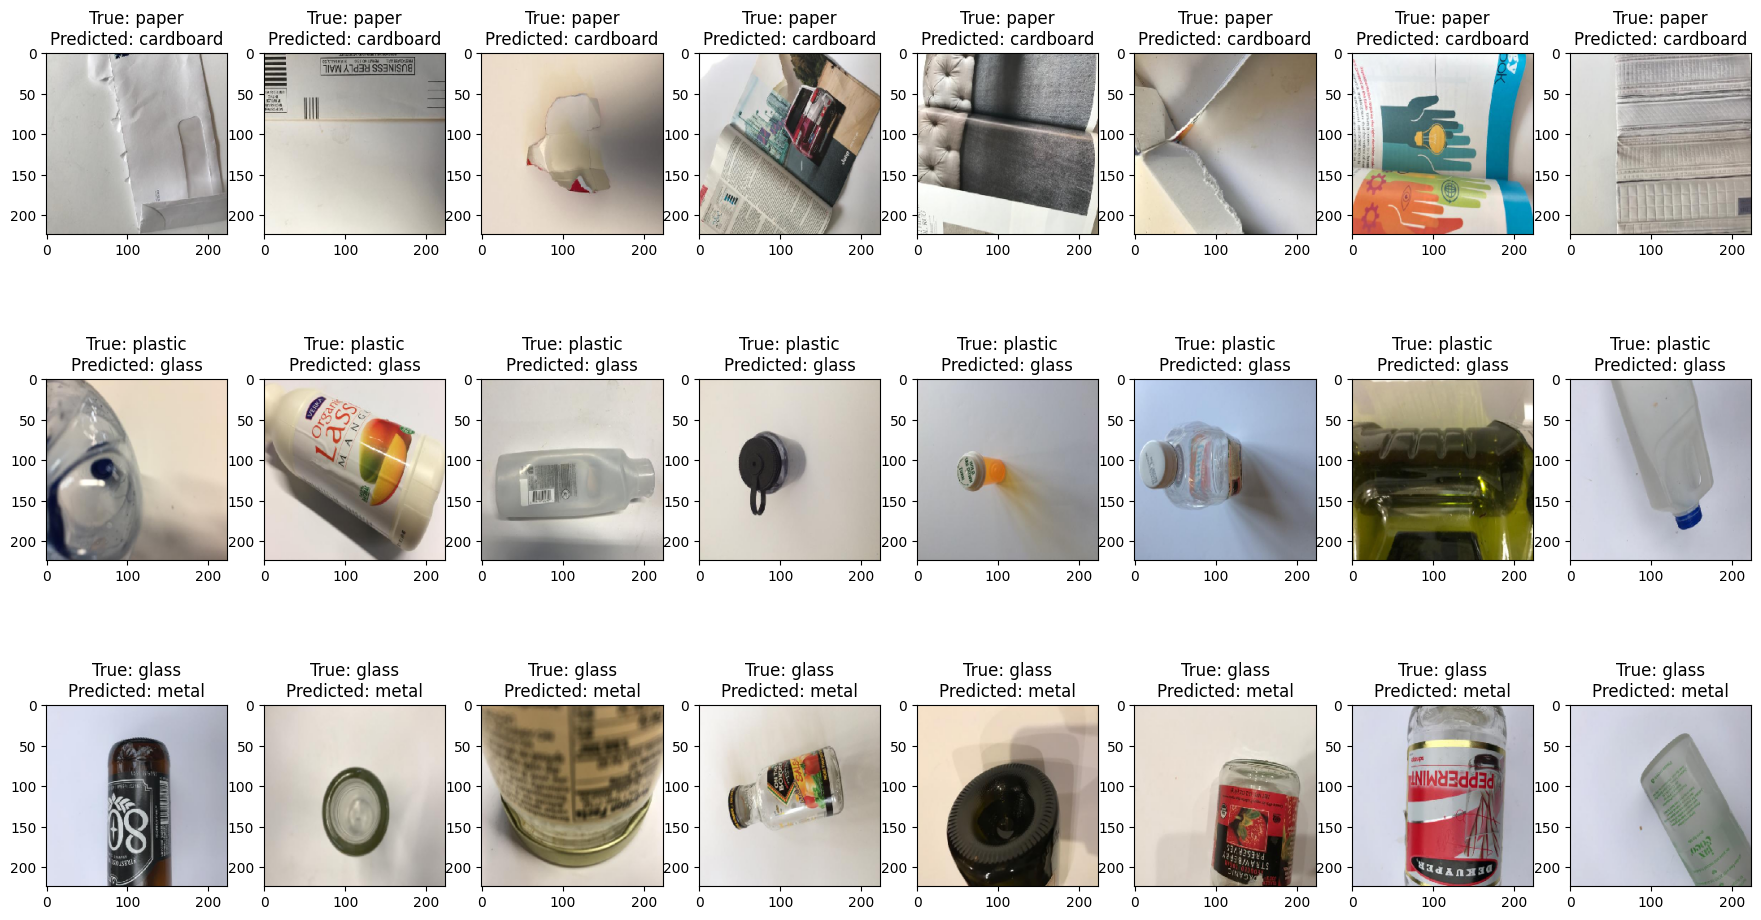

In [38]:
fig, ax = plt.subplots(3, 8, figsize=(22, 12))

i, j = 0, 0
while i < 3:
    for r_num in range(len(y_test)):
        if j == 8:
            j = 0
            break

        # Paper as Cardboard
        if i == 0:
            if y_pred[r_num] == 2 and y_test[r_num] == 5:
                ax[i, j].imshow(X_test[r_num])
                ax[i, j].set_title('True: ' + class_names[5] + '\nPredicted: ' + class_names[2])
                j += 1
        
        # Plastic as Glass
        elif i == 1:
            if y_pred[r_num] == 3 and y_test[r_num] == 6:
                ax[i, j].imshow(X_test[r_num])
                ax[i, j].set_title('True: ' + class_names[6] + '\nPredicted: ' + class_names[3])
                j += 1

        # Glass as Metal
        elif i == 2:
            if y_pred[r_num] == 4 and y_test[r_num] == 3:
                ax[i, j].imshow(X_test[r_num])
                ax[i, j].set_title('True: ' + class_names[3] + '\nPredicted: ' + class_names[4])
                j += 1
    i += 1

Based on the findings, the misclassifications don't seem to share any obvious visual similarities. Therefore, it is difficult to determine how to improve the model's performance on those images. However, traning on a more diverse training set might help improve the model's performance on those images.

## **Task 3 (D Task) Improve model generalisability across domains**

So far, you have used training and test images from the same source (via random data split). Now collect new test images from a different source. For example, you may take some photos yourself if you used downloaded images before.
Otherwise, you may take new photos using a different mobile phone or against a different background.

Show sample images from the original test data and the newly collected test data. In what ways are they different?

Feed the new test data into your model. Report the performance change.

Improve your model so that it generalises better on unseen test images.

In [39]:
new_test_generator = test_datagen.flow_from_directory(
    new_test,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 125 images belonging to 8 classes.


**How are these images different?**

I've manually made an entirely new dataset by saving images from google images here. I've called this the new_test dataset. These are drastically different then the training images plotted in Task 1. The images are taken from a different source and have different backgrounds. The images are also taken from different angles and have different lighting conditions. The images are also of different sizes.

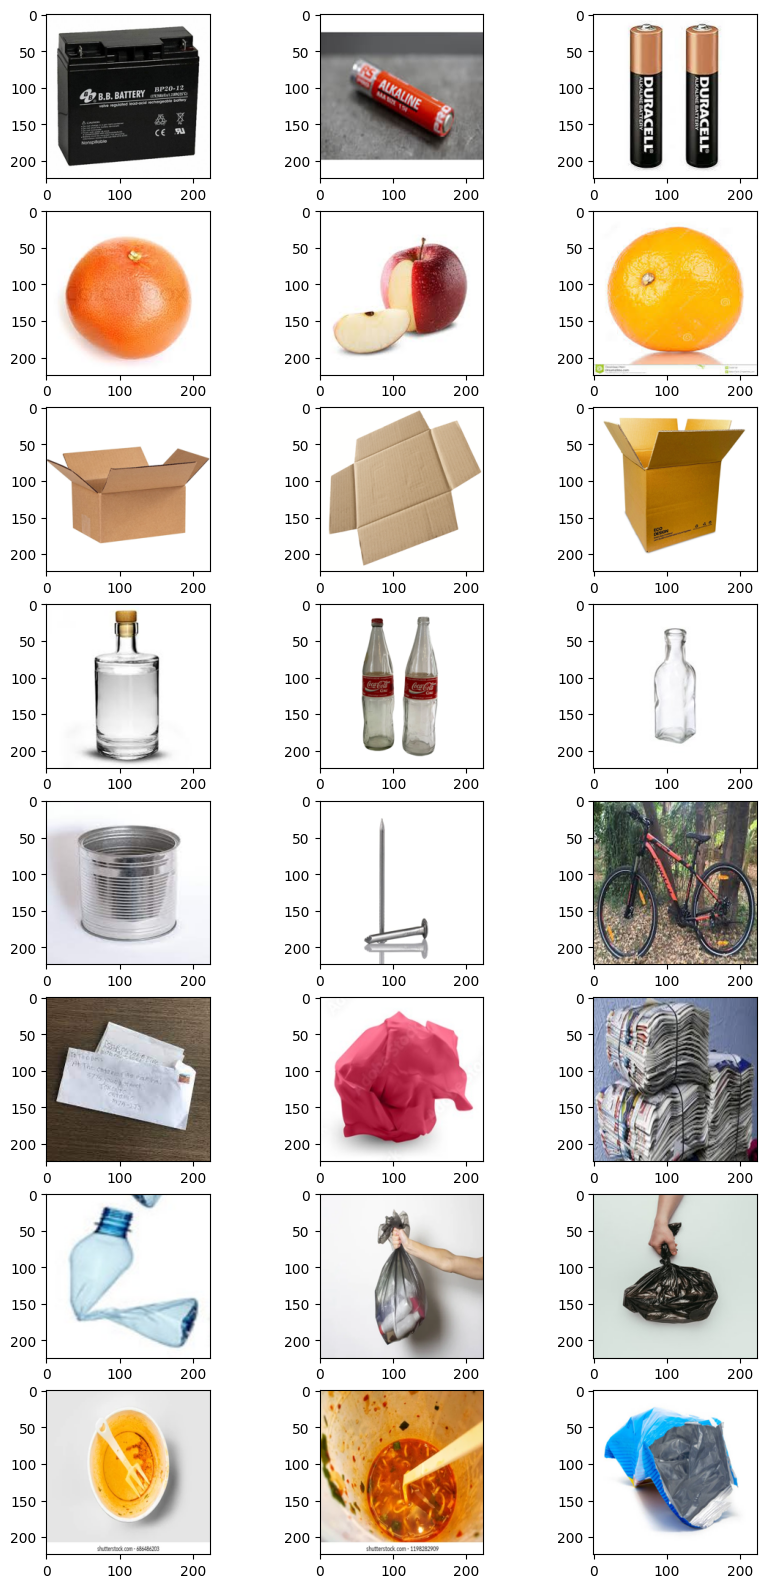

In [47]:
# Plot 5 random images from the training dataset for each class
fig, ax = plt.subplots(8, 3, figsize=(10, 20))

for class_name in os.listdir(new_test):
    waste_class = os.path.join(new_test, class_name)
    rand_imgs = np.random.randint(0, len(os.listdir(waste_class))-1, size=3)
    for i in rand_imgs:
        img = Image.open(os.path.join(waste_class, os.listdir(waste_class)[i]))
        img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
        ax[list(os.listdir(new_test)).index(class_name), rand_imgs.tolist().index(i)].imshow(img)

In [40]:
y_true = new_test_generator.classes
model.load_weights('models/MobileNetv2_model.h5')
y_pred = model.predict(new_test_generator)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_true, y_pred))

2/4 [==============>...............] - ETA: 0s

c:\Users\sudak\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 [==============================] - 1s 262ms/step
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       0.86      1.00      0.93        25
           2       0.68      1.00      0.81        15
           3       0.69      0.79      0.73        14
           4       0.50      0.40      0.44        15
           5       0.80      0.27      0.40        15
           6       0.62      0.38      0.48        13
           7       0.64      0.58      0.61        12

    accuracy                           0.71       125
   macro avg       0.69      0.68      0.66       125
weighted avg       0.71      0.71      0.68       125



As I've already applied Dropout and Batch Normalisation, I think adding a new Dropout layer would be redundant. Therefore, I've decided to add a new Batch Normalisation just before the last classification layer and increased the Dropout to 0.25.

In [54]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle = False
)

Found 2570 images belonging to 8 classes.
Found 527 images belonging to 8 classes.
Found 819 images belonging to 8 classes.


In [50]:
model = Sequential()

# Add the Xception convolutional base model
mobile = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), 
                     include_top=False,
                     weights='imagenet')

# Freeze the convolutional base
for layer in mobile.layers:
    layer.trainable = False

mobile.summary()

# Add new layers
model.add(mobile)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

callback_1 = EarlyStopping(monitor='val_loss', patience=10, mode='auto')
callback_2 = EarlyStopping(monitor='val_accuracy', patience=10, mode='auto')
callback_3 = ModelCheckpoint(filepath='models/regularised_MobileNetv2_model.h5', monitor='val_accuracy', save_best_only=True)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [51]:
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    epochs = 30,
    callbacks = [callback_1, callback_2, callback_3]
)

Epoch 1/30
81/81 [==============================] - 26s 286ms/step - loss: 1.1829 - accuracy: 0.5875 - val_loss: 0.5595 - val_accuracy: 0.8254
Epoch 2/30
81/81 [==============================] - 21s 254ms/step - loss: 0.7897 - accuracy: 0.7296 - val_loss: 0.4578 - val_accuracy: 0.8539
Epoch 3/30
81/81 [==============================] - 19s 233ms/step - loss: 0.7017 - accuracy: 0.7732 - val_loss: 0.4612 - val_accuracy: 0.8444
Epoch 4/30
81/81 [==============================] - 19s 240ms/step - loss: 0.6101 - accuracy: 0.7934 - val_loss: 0.3775 - val_accuracy: 0.8824
Epoch 5/30
81/81 [==============================] - 20s 241ms/step - loss: 0.5766 - accuracy: 0.8089 - val_loss: 0.3536 - val_accuracy: 0.8786
Epoch 6/30
81/81 [==============================] - 19s 240ms/step - loss: 0.5495 - accuracy: 0.8183 - val_loss: 0.3496 - val_accuracy: 0.8880
Epoch 7/30
81/81 [==============================] - 19s 239ms/step - loss: 0.5266 - accuracy: 0.8296 - val_loss: 0.3479 - val_accuracy: 0.8899

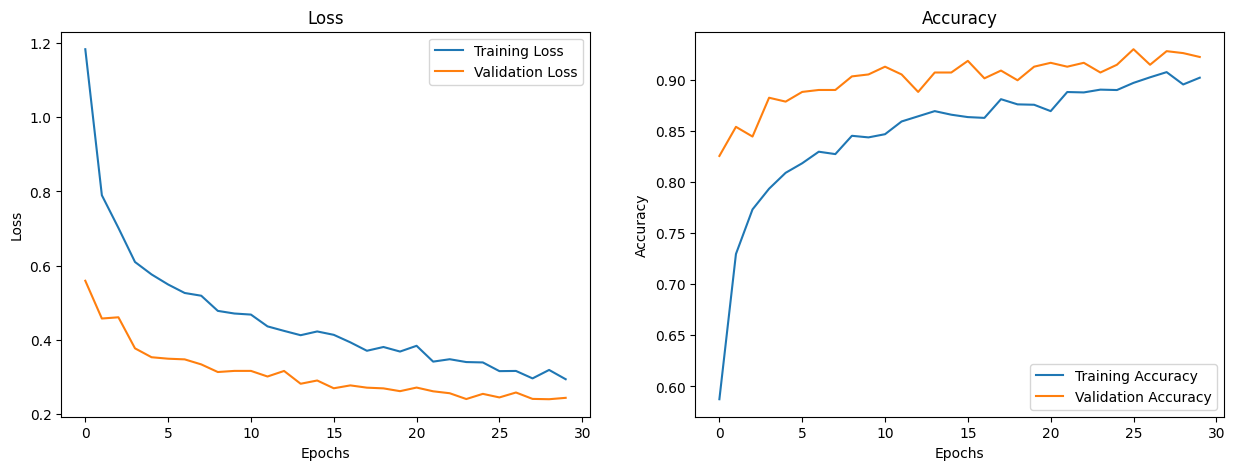

In [52]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x='epoch', y='loss', data=hist, label='Training Loss', ax = ax[0])
sns.lineplot(x='epoch', y='val_loss', data=hist, label='Validation Loss', ax = ax[0])
ax[0].set_title('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

sns.lineplot(x='epoch', y='accuracy', data=hist, label='Training Accuracy', ax = ax[1])
sns.lineplot(x='epoch', y='val_accuracy', data=hist, label='Validation Accuracy', ax = ax[1])
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

In [55]:
y_true = new_test_generator.classes
model.load_weights('models/regularised_MobileNetv2_model.h5')
y_pred = model.predict(new_test_generator)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_true, y_pred))

2/4 [==============>...............] - ETA: 0s

c:\Users\sudak\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 [==============================] - 1s 218ms/step
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        16
           1       0.83      1.00      0.91        25
           2       0.82      0.93      0.87        15
           3       0.92      0.79      0.85        14
           4       0.33      0.27      0.30        15
           5       0.60      0.40      0.48        15
           6       0.57      0.31      0.40        13
           7       0.38      0.25      0.30        12

    accuracy                           0.66       125
   macro avg       0.63      0.62      0.60       125
weighted avg       0.65      0.66      0.64       125



As the changes only make the model performance worse, I've concluded that the previous model is more generalised than this model.

## **Task 4 (HD Task) Build a workable prototype**

Build a web/mobile app that people from your city council can use to determine what to recycle. Test your prototype with the target users and report their feedback.

Upload your code into a GitHub repository.

Create a short video presentation about your product.

Github Link: [Click Here](https://github.com/sudislife/Waste-Classification)

Don't run this here, please run the seperate image_classification_app.py using `streamlit run image_classification_app.py`.

In [1]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import cv2

IMAGE_SIZE = 224
BATCH_SIZE = 8
class_names = ['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

def preprocess_image(image):
    image = np.array(image)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    image = image / 255.0
    image = image.reshape(1, IMAGE_SIZE, IMAGE_SIZE, 3)
    return image

def classify_waste(image, class_names):
    image = preprocess_image(image)
    model = tf.keras.models.load_model('models/MobileNetv2_model.h5')
    y_pred = model.predict(image)
    print(np.argmax(y_pred, axis=1))
    confidence = y_pred[0][np.argmax(y_pred, axis=1)]
    y_pred = class_names[np.argmax(y_pred, axis=1)[0]]
    return y_pred, confidence[0]

st.title("Waste Classification App")

uploaded_file = st.file_uploader("Choose an image")
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Classify the image
    label, confidence = classify_waste(image, class_names)
    
    label = 'Class: ' + label
    st.write(label)
    confidence = 'Confidence: ' + str(round(confidence*100, 2)) + '%'
    st.write(confidence)

    if 'battery' in label:
        st.write('Batteries are NOT to be thrown in any of the bins. They can cause fires at landfills. So, please drop them off for free at Drysdale or Geelong Resource Recovery Centres')
        st.write('Alternatively, ALDI, IGA, Bunnings and Woolworths stores accept batteries for recycling')
    
    elif 'biological' in label:
        st.write('Biological Waste is to be thrown in the Red Lid Rubbish Bin')
    
    elif 'cardboard' in label:
        st.write('Cardboard is to be thrown in the Yellow Lid Recycling Bin')
    
    elif 'glass' in label:            
        st.write('Glass is to be thrown in the Red Lid Recycling Bin')
    
    elif 'metal' in label:            
        st.write('Steel cans should be rinsed and placed in your yellow-topped recycling bin')
        st.write("Aluminium Cans and Foils can also be placed in the yellow topped recycling bin. Please rinse and squash them first")
    
    elif 'paper' in label:            
        st.write("Baking paper must be placed in the red landfill bin.")
        st.write("Envelopes, Magazines, and Newspapers can be placed in your yellow lid recycling bin. This include window faced envelopes.")
    
    elif 'plastic' in label:
        st.write("Plastic bags should be placed in the red landfill bin.")
        st.write("Remove the plastic bottle tops and place the empty plastic bottles in the Red recycling bin.")
    
    elif 'trash' in label:
        st.write("Trash is to be thrown in the Red Lid Rubbish Bin")

    
    st.write('Misclassified? Click one of the buttons below.')

    if st.button('Battery'):
        st.write('Batteries are NOT to be thrown in any of the bins. They can cause fires at landfills. So, please drop them off for free at Drysdale or Geelong Resource Recovery Centres')
        st.write('Alternatively, ALDI, IGA, Bunnings and Woolworths stores accept batteries for recycling')

    if st.button('Biological'):
        st.write('Biological Waste is to be thrown in the Red Lid Rubbish Bin')

    if st.button('Cardboard'):
        st.write('Cardboard is to be thrown in the Yellow Lid Recycling Bin')

    if st.button('Glass'):
        st.write('Glass is to be thrown in the Red Lid Recycling Bin')

    if st.button('Metal'):
        st.write('Steel cans should be rinsed and placed in your yellow-topped recycling bin')
        st.write("Aluminium Cans and Foils can also be placed in the yellow topped recycling bin. Please rinse and squash them first")

    if st.button('Paper'):
        st.write("Baking paper must be placed in the red landfill bin.")
        st.write("Envelopes, Magazines, and Newspapers can be placed in your yellow lid recycling bin. This include window faced envelopes.")

    if st.button('Plastic'):
        st.write("Plastic bags should be placed in the red landfill bin.")
        st.write("Remove the plastic bottle tops and place the empty plastic bottles in the Red recycling bin.")

    if st.button('Trash'):
        st.write("Trash is to be thrown in the Red Lid Rubbish Bin")

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<function __main__.app()>

---
**END OF ASSIGNMENT TWO**